In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-11-12 11:29:06.834455: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-12 11:29:06.844799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731407346.857002   61962 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731407346.860488   61962 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 11:29:06.872529: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Carga de datos y preprocesamiento

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definición de modelo (red neuronal)

In [3]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/home/antonio/code/uncertainty-pinns/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731407348.179875   61962 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1186 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1731407349.097654   62051 service.cc:148] XLA service 0x71c5e801af30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731407349.097680   62051 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-11-12 11:29:09.110167: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1731407349.157776   62051 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-12 11:29:09.182542: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


344/516 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.7079

I0000 00:00:1731407349.706074   62051 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - loss: 1.4288 - val_loss: 0.4433
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.4026 - val_loss: 0.4046
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - loss: 0.3674 - val_loss: 0.3798
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.3501 - val_loss: 0.3466
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - loss: 0.3272 - val_loss: 0.3309
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 0.3544 - val_loss: 0.3227
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.3193 - val_loss: 0.3234
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.3214 - val_loss: 0.3164
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.3213 - val_loss: 0.3060
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.3037 - val_loss: 0.3038


# Obtener errores

In [4]:
y_pred_train = model.predict(X_train)

# Calcular los residuos (errores)
residuos = y_train - y_pred_train.flatten()

# Cuantiles de los residuos
q1 = 0.025  
q2 = 0.975

# Percentiles de los residuos (2.5% y 97.5%)
residuo_q1 = np.percentile(residuos, q1 * 100)
residuo_q2 = np.percentile(residuos, q2 * 100)

print(f"Residuo percentil 2.5%: {residuo_q1}")
print(f"Residuo percentil 97.5%: {residuo_q2}")

516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step
Residuo percentil 2.5%: -0.9034741947650909
Residuo percentil 97.5%: 1.3568363856754304


# Predicción y visualización

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
Predicción: [0.522859], Intervalo: [-0.3806152174472809, 1.8796953629932405], Amplitud: 2.2603105804405215
Predicción: [1.3182842], Intervalo: [0.4148099591732025, 2.675120539613724], Amplitud: 2.2603105804405215
Predicción: [4.4646783], Intervalo: [3.5612040927410127, 5.821514673181534], Amplitud: 2.2603105804405215
Predicción: [2.4629872], Intervalo: [1.5595129897594453, 3.8198235701999668], Amplitud: 2.2603105804405215
Predicción: [2.85814], Intervalo: [1.954665796995163, 4.2149763774356845], Amplitud: 2.2603105804405215


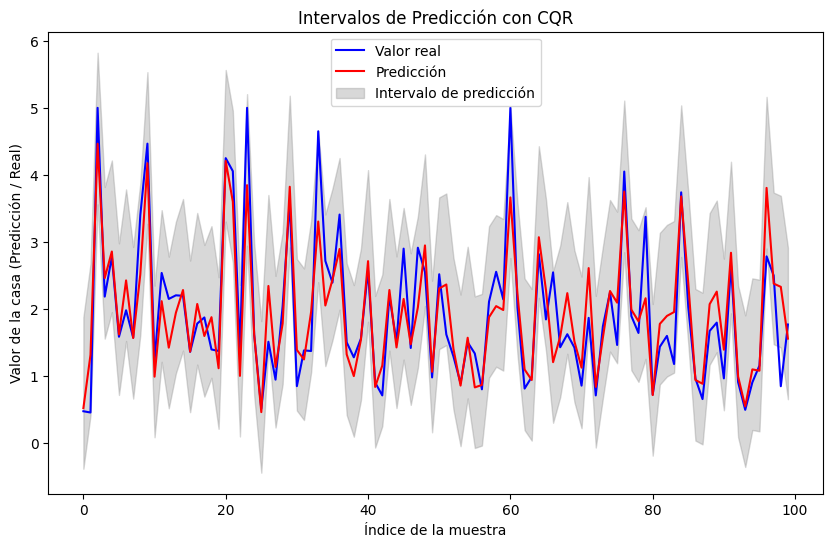

In [7]:
y_pred_test = model.predict(X_test)

# Intervalos de predicción
intervalos_inferiores = y_pred_test.flatten() + residuo_q1
intervalos_superiores = y_pred_test.flatten() + residuo_q2

# Ejemplo para los 5 primeros casos
for i in range(5):
    print(f"Predicción: {y_pred_test[i].flatten()}, Intervalo: [{intervalos_inferiores[i]}, {intervalos_superiores[i]}], Amplitud: {intervalos_superiores[i] - intervalos_inferiores[i]}")

# Visualizacion
plt.figure(figsize=(10, 6))
plt.plot(np.arange(100), y_test[:100], label='Valor real', color='blue')
plt.plot(np.arange(100), y_pred_test[:100], label='Predicción', color='red')
plt.fill_between(np.arange(100), intervalos_inferiores[:100], intervalos_superiores[:100], color='gray', alpha=0.3, label='Intervalo de predicción')
plt.legend()
plt.title("Intervalos de Predicción con CQR")
plt.xlabel("Índice de la muestra")
plt.ylabel("Valor de la casa (Predicción / Real)")
plt.show()